## **About Dataset**

## **Context**

### **This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.**


## **Content**

### **The datasets consists of several medical predictor variables and one target variable, Outcome.** 
### **Predictor variables includes the number of**
### **pregnancies the patient has had,**
### **their BMI,**
### **insulin level,** 
### **age,** 
### **and so on.**

## **SOLUTION**


### **Approch of project**

### **1] Importing necessary libraries**

### **2] Basic Opearions**

### **3] Checking for null and duplicate values**

### **4] Exploratory Data Analysis and drawing insights**

### **5] Correlation of target variable**

### **6] Splitting data into training and testing data set**

### **7] Creating pipeline**

### **8] Accuracy from different models**

### **9] Deployment of best model**

### **10] Predictions on new data**


### **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore') 
 

### **Importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

## **Basic Operations**

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Let's check for null values**

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###  **Data set does not contain any null values**

### **Searching for dulicate values**

In [ ]:
diabetes_dup = diabetes.duplicated().sum()
diabetes_dup

0

### **Explortory Data Analysis**

**Correlation of Dataset**

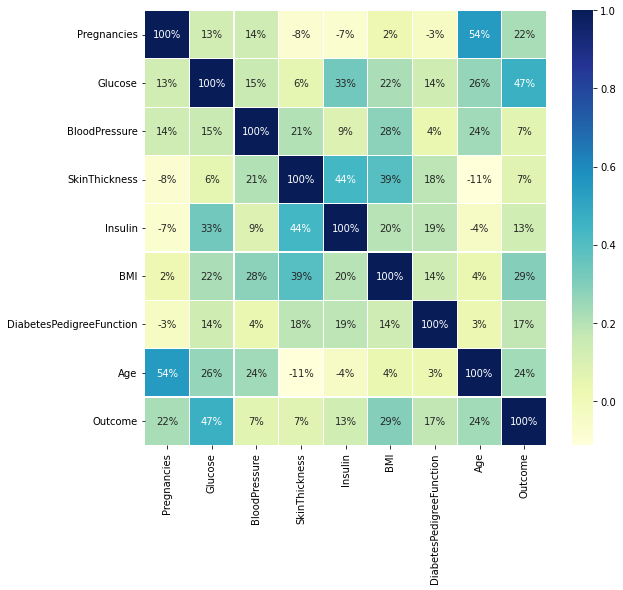

In [ ]:
# Correlation of dataset
corrmat = diabetes.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True,fmt = '.0%')

### **Insights from above graph**


### **Outcome is 48% correlated with Glucose which is obvious as diabetes is highly dependent on glucose level in our blood.**

### **Also Age and pregnancies is also correlated by 54%. Below 18 age no one can become pregnant also not after 50 age so it is 54% dependent.**



###**Correlation of Target Variable**

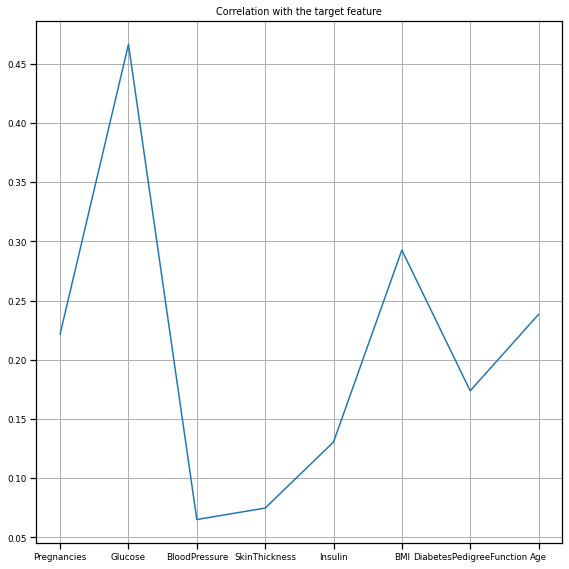

In [ ]:
sns.set_context('notebook',font_scale = 0.8)
diabetes.drop('Outcome', axis=1).corrwith(diabetes.Outcome).plot(kind='line', grid=True, figsize=(8, 8), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

### **Insights that can be drawn:**

### **1] Features like 'Pregnancies' , 'Glucose' , 'Insulin' are positively correlated with our target variable i.e 'Outcome'**


## **Target Variable**

In [ ]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

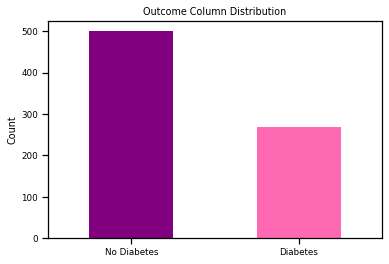

In [ ]:
diabetes["Outcome"].value_counts().plot(kind="bar",color=["purple","hotpink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0)
plt.title('Outcome Column Distribution')
plt.ylabel('Count')
plt.show()

### **Insights**

### **There are 32.02% (220 peoples) people with diabetes and 67.98% (467 peoples) people who are not diagnosed with diabetes.**

### **Distribution of correlation of features in (%)**

In [ ]:
diabetes_corr_bar = abs(diabetes.corr()['Outcome']).sort_values()[:-1]*100
diabetes_corr_bar

BloodPressure                6.506836
SkinThickness                7.475223
Insulin                     13.054795
DiabetesPedigreeFunction    17.384407
Pregnancies                 22.189815
Age                         23.835598
BMI                         29.269466
Glucose                     46.658140
Name: Outcome, dtype: float64

In [ ]:
def distplot(col_name):
    plt.figure()
    ax = sns.distplot(diabetes[col_name][diabetes.Outcome == 1], color ="darkturquoise", rug = True)
    sns.distplot(diabetes[col_name][diabetes.Outcome == 0], color ="lightcoral",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

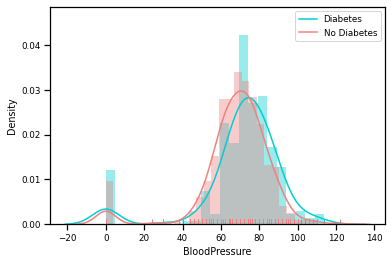

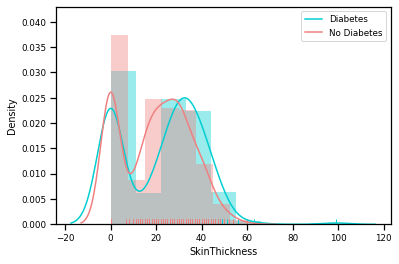

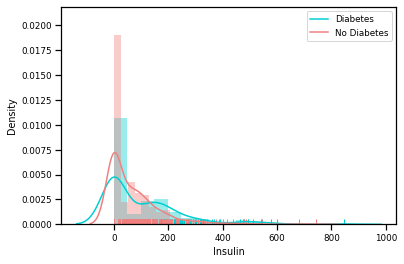

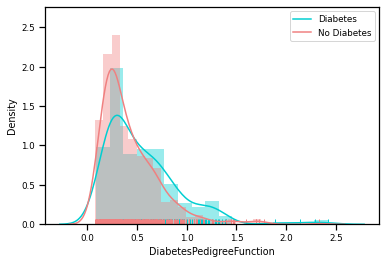

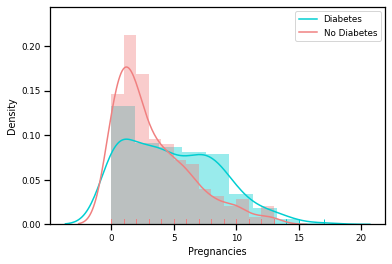

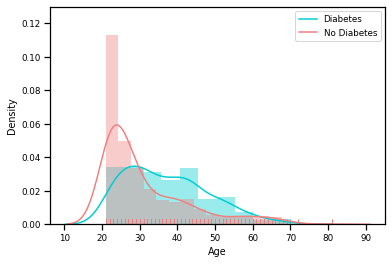

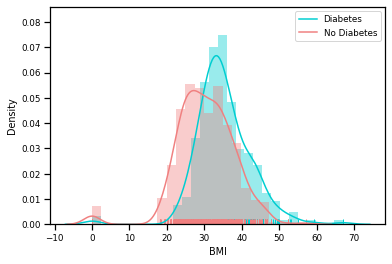

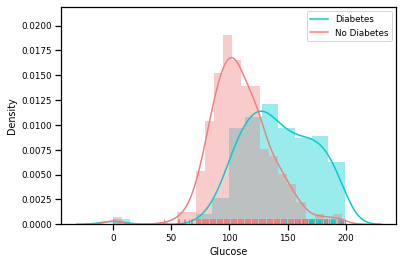

In [ ]:
Col = ["BloodPressure" , "SkinThickness" , "Insulin" , "DiabetesPedigreeFunction" , "Pregnancies" , "Age" , "BMI" , "Glucose"]

for i in Col:
  distplot(i)

### **Insights**
### **1] The number of pregnancies is high for the diabetic people**
### **2] The glucose levels of diabetic people is generally high.**
### **3] People with high BloodPressure have more chance of diabeties**
### **4] Diabetic people have a little more thick skin**
### **5] People with more insulin level tend to have Diabetes**
### **6] Diabetic people have higher BMI.**
### **7] We can see that old people are more diabetic.**

### **8]The midle aged women are most likely to be diabetic than the young women in the age group of 31-40 and 41-55.**

### **Store Feature matrix in X and response(target) variable into Y**

In [ ]:
X = diabetes.drop('Outcome' , axis = 1)
y = diabetes['Outcome']

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### **Splitting data into Training and Testing set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### **Scikit-Learn Pipeline**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

### **Creating Pipeline**

In [ ]:
Pipeline_lr = Pipeline([('scalar1' , StandardScaler()),
                                    ('lr_classifier',LogisticRegression())])

Pipeline_knn = Pipeline([('scalar2' ,StandardScaler()),
                         ('knn_classifier' , KNeighborsClassifier())])

Pipeline_svc = Pipeline([('scalar3' , StandardScaler()),
                         ('svc_classifier' , SVC())])

Pipeline_dt = Pipeline([('dt_classifier' , DecisionTreeClassifier())])
Pipeline_rf = Pipeline([('rf_classifier' , RandomForestClassifier(max_depth = 3))])
Pipeline_gb = Pipeline([('gb_classifier' , GradientBoostingClassifier())])

In [ ]:
Pipelines = [Pipeline_lr,
            Pipeline_knn,
            Pipeline_svc,
            Pipeline_dt,
            Pipeline_rf,
            Pipeline_gb]

In [ ]:
for pipe in Pipelines:
  pipe.fit(X_train,y_train)

### **Lets find ACCURACY of models**
### **[To find our best models]**

In [ ]:
pipe_dict = {0:'LR',
             1:'KNN',
             2:'SVC',
             3:'DT',
             4:'RF',
             5:'GB'}

In [ ]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GB'}

In [ ]:
for i,model in enumerate(Pipelines):
  print('{} Test Accuracy : {}'.format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy : 75.32467532467533
KNN Test Accuracy : 69.48051948051948
SVC Test Accuracy : 73.37662337662337
DT Test Accuracy : 74.02597402597402
RF Test Accuracy : 77.92207792207793
GB Test Accuracy : 74.67532467532467


### **Let's train Random Forest Classifier [Best Model] on our Data set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = diabetes.drop('Outcome' , axis = 1)
y = diabetes['Outcome']

In [ ]:
rf = RandomForestClassifier(max_depth = 3)

In [ ]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

### **Predictions on new data**

In [ ]:
new_data = pd.DataFrame({'Pregnancies':6,
                         'Glucose':148.0,
                         'BloodPressure':72.0,
                         'SkinThickness':35.0,
                         'Insulin':79.89,
                         'BMI':33.6,
                         'DiabetesPedigreeFunction':0.627,
                         'Age':70,
                         },index=[0])

In [ ]:
X = diabetes.drop('Outcome' , axis = 1)
y = diabetes['Outcome']

In [ ]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

In [ ]:
p = rf.predict(new_data)
p

array([1])

In [ ]:
if p[0] == 0:
  print('Non-diabetic')
else:
  print('Diabetic')

Diabetic


## **So here our ML Diabetes Prediction Model is ready**


### **THANK YOU**